In [39]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import torch
import torch.nn as nn

In [40]:
# Load the body pose estimation model (OpenPose-like)
protoFile = "../src/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "../src/models/pose/mpi/pose_iter_160000.caffemodel"


In [16]:
def detect_pose(frame, net, nPoints, POSE_PAIRS):
    inWidth = 368
    inHeight = 368
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                                    (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    H = output.shape[2]
    W = output.shape[3]

    points = []
    for i in range(nPoints):
        probMap = output[0, i, :, :]
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        x = (frame.shape[1] * point[0]) / W
        y = (frame.shape[0] * point[1]) / H
        if prob > 0.1:
            points.append((int(x), int(y)))
        else:
            points.append(None)
    return points

In [17]:
def draw_pose(frame, points, POSE_PAIRS):
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]
        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
            cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
    return frame


In [18]:
def load_video_frames(video_path, sample_per_vid=10, input_shape=(256, 256)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    sample_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or sample_count >= sample_per_vid:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, input_shape)
        frames.append(frame)
        sample_count += 1
    cap.release()
    return frames

In [19]:
def show_frame(frame, title="Frame"):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    _, img_encoded = cv2.imencode('.png', frame_rgb)
    display(Image(data=img_encoded.tobytes()))

In [20]:
def visualize_frames(frames, title="Frames"):
    for i, frame in enumerate(frames):
        show_frame(frame, title=f"{title} {i + 1}")

In [21]:
def visualize_frames_with_joints(frames, net, nPoints, POSE_PAIRS, title="Frames with Joints"):
    for i, frame in enumerate(frames):
        points = detect_pose(frame, net, nPoints, POSE_PAIRS)
        frame_with_joints = draw_pose(frame, points, POSE_PAIRS)
        show_frame(frame_with_joints, title=f"{title} {i + 1}")

In [26]:
# Set the path to your dataset
data_dir = "../data/raw/HAR_Video_Dataset/Clapping"  # Change this to the class you want to visualize

# List video files in the directory
video_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]

In [28]:
# Visualize frames without joints
for video_file in video_files[:1]:  # Change the slice to visualize more videos
    print(f"Visualizing frames for video: {video_file}")
    frames = load_video_frames(video_file, sample_per_vid=10, input_shape=(256, 256))
    visualize_frames(frames)


Visualizing frames for video: ../data/raw/HAR_Video_Dataset/Clapping\Clapping (1).mp4


TypeError: 'module' object is not callable

In [15]:
# Visualize frames with joints
for video_file in video_files[:1]:  # Change the slice to visualize more videos
    print(f"Visualizing frames with joints for video: {video_file}")
    frames = load_video_frames(video_file, sample_per_vid=10, input_shape=(256, 256))
    visualize_frames_with_joints(frames, net, nPoints, POSE_PAIRS)

In [41]:
import cv2
import numpy as np
import os
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt
from io import BytesIO
from torchvision import transforms
from PIL import Image as PILImage
import torch
import torch.nn as nn

# Load the body pose estimation model (OpenPose-like)
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
nPoints = 15
POSE_PAIRS = [[0, 1], [1, 2], [2, 3], [3, 4], [1, 5], [5, 6], [6, 7], [1, 14], [14, 8], [8, 9], [9, 10], [14, 11], [11, 12], [12, 13]]

def detect_pose(frame, net, nPoints, POSE_PAIRS):
    inWidth = 368
    inHeight = 368
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                                    (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inpBlob)
    output = net.forward()
    H = output.shape[2]
    W = output.shape[3]

    points = []
    for i in range(nPoints):
        probMap = output[0, i, :, :]
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
        x = (frame.shape[1] * point[0]) / W
        y = (frame.shape[0] * point[1]) / H
        if prob > 0.1:
            points.append((int(x), int(y)))
        else:
            points.append(None)
    return points

def draw_pose(frame, points, POSE_PAIRS):
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]
        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
            cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
    return frame

def load_video_frames(video_path, sample_per_vid=100, input_shape=(256, 256)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    sample_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or sample_count >= sample_per_vid:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, input_shape)
        frames.append(frame)
        sample_count += 1
    cap.release()
    return frames

def show_frame(frame, title="Frame"):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    _, img_encoded = cv2.imencode('.png', frame_rgb)
    display(IPImage(data=img_encoded.tobytes()))

def visualize_frames(frames, title="Frames"):
    for i, frame in enumerate(frames):
        show_frame(frame, title=f"{title} {i + 1}")

def visualize_frames_with_joints(frames, net, nPoints, POSE_PAIRS, title="Frames with Joints"):
    for i, frame in enumerate(frames):
        points = detect_pose(frame, net, nPoints, POSE_PAIRS)
        frame_with_joints = draw_pose(frame, points, POSE_PAIRS)
        show_frame(frame_with_joints, title=f"{title} {i + 1}")


In [45]:
# Set the path to your dataset
data_dir = "../data/raw/HAR_Video_Dataset/clapping"  # Change this to the class you want to visualize

# List video files in the directory
video_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.mp4')]


Visualizing frames for video: ../data/raw/HAR_Video_Dataset/clapping\Clapping (1).mp4


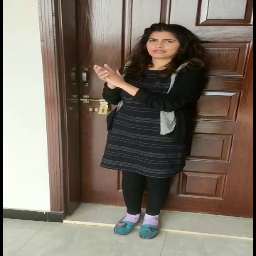

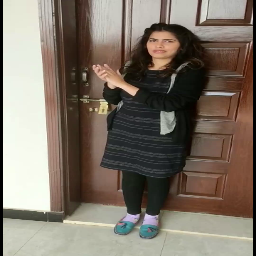

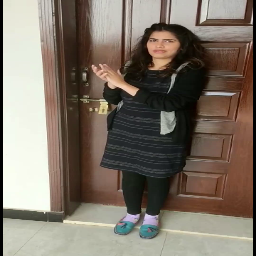

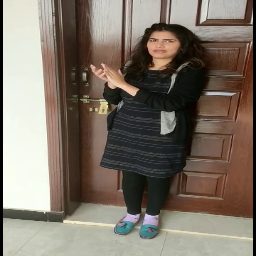

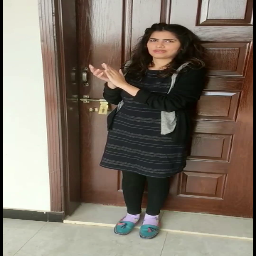

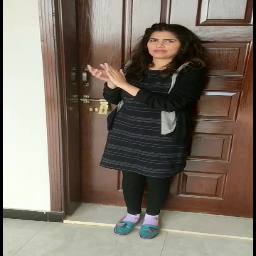

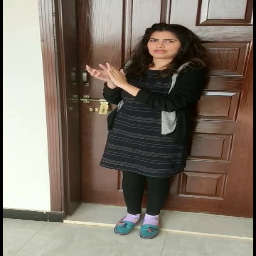

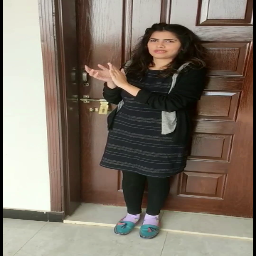

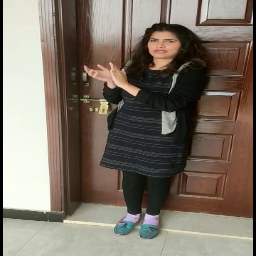

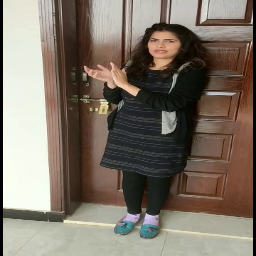

In [46]:
# Visualize frames without joints
for video_file in video_files[:1]:  # Change the slice to visualize more videos
    print(f"Visualizing frames for video: {video_file}")
    frames = load_video_frames(video_file, sample_per_vid=10, input_shape=(256, 256))
    visualize_frames(frames)

Visualizing frames with joints for video: ../data/raw/HAR_Video_Dataset/clapping\Clapping (1).mp4


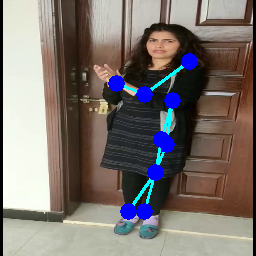

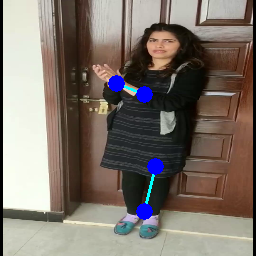

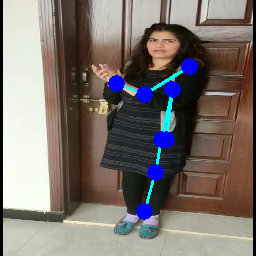

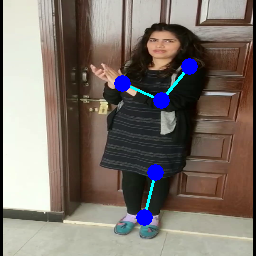

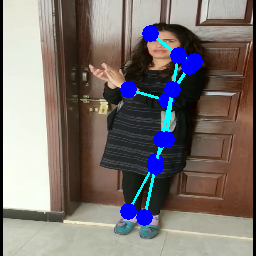

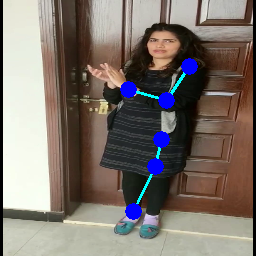

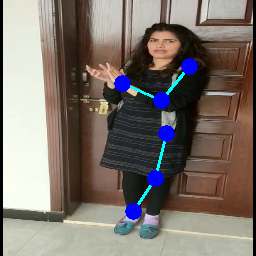

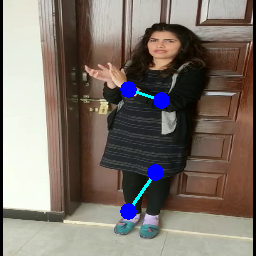

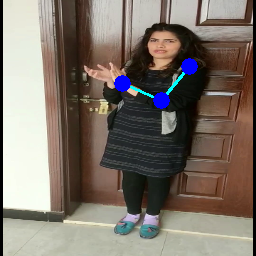

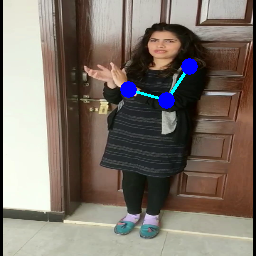

In [47]:
# Visualize frames with joints
for video_file in video_files[:1]:  # Change the slice to visualize more videos
    print(f"Visualizing frames with joints for video: {video_file}")
    frames = load_video_frames(video_file, sample_per_vid=10, input_shape=(256, 256))
    visualize_frames_with_joints(frames, net, nPoints, POSE_PAIRS)